필요한 라이브러리 모듈 가져오기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

난수 생성

In [2]:
np.random.seed(20180427)
tf.set_random_seed(20180427)

확률이 0 , 1 인 난수 선언, 확률이 0 ,1 인 난수를 하나의 DataFrame에 저장
> * multivariate_normal(mean, cov[, size, check_valid, tol]) : 다변수 정규 분포에서 무작위로 샘플을 선언
> * n(total): 난수의 갯수
> * mu(mean): n 차원 분포의 평균
> * df['t'] : 확률 (0 or 1)

In [13]:
# 1번째 영역 난수(확률 0) 생성
data0 = multivariate_normal([7,7],np.eye(2)*22,15)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

# 2번째 영역 난수(확률 0) 생성
data1 = multivariate_normal([22,7],np.eye(2)*22,15)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 0

# 3번째 영역 난수(확률 0) 생성
data2 = multivariate_normal([7,22],np.eye(2)*22,10)
df2 = DataFrame(data2, columns=['x1','x2'])
df2['t'] = 0

# 4번째 영역 난수(확률 0) 생성
data3 = multivariate_normal([20,20],np.eye(2)*22,25)
df3 = DataFrame(data3, columns=['x1','x2'])
df3['t'] = 1

# permutation() : 순서 무작위로 바꿈 셔플 
df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

train_set

,x1,x2,t
0,20.499412,3.453654,0
1,17.155935,17.419235,0
2,21.528452,6.180155,0
3,16.682297,25.703764,1
4,19.382776,19.793274,1
5,8.103958,21.063772,0
6,15.360157,19.390955,0
7,10.232504,14.819668,0
8,19.020863,23.126600,1
9,3.301010,1.161148,0


생성된 학습 모델을 train_x, train_t에 행렬로 저장

In [4]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

신경망의 노드수 정의

In [5]:
nodeNum = 2

**1단계 수식작성** 신경망네트워크를 구성하고 각각의 노드의 수식을 작성
> * x : mnist 데이터
> * tf.tanh(x,name=None) : Sigmoid 의 크기와 위치를 조절한 함수 범위는 -1 ~ 1이다
> * 딥러닝 학습 기술들 참고자료 : https://ratsgo.github.io/deep%20learning/2017/04/22/NNtricks/

In [6]:
mult = train_x.flatten().mean()
# input Layer
x = tf.placeholder(tf.float32, [None, 2])

# hidden Layer
w1 = tf.Variable(tf.truncated_normal([2, nodeNum]))
b1 = tf.Variable(tf.zeros([nodeNum]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1*mult)

# output LKayer
w0 = tf.Variable(tf.zeros([nodeNum, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0*mult)

**2단계 오차함수 작성**

In [7]:
t = tf.placeholder(tf.float32, [None, 1])
costFunction = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))

**3단계 최적화 과정을 통해 파리미터 값을 결정**

In [8]:
trainOptimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0017)
train = trainOptimizer.minimize(costFunction)

예측값과 정확도 구하는 식 선언

In [9]:
prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

세션 정의 및 변수 초기화
> * 그래프 세션관련 정리 참고자료 : https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/api_docs/python/client.html

In [10]:
sess = tf.Session()
# sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

10,000번 학습 과정을 통하여 손실값과 정확도 출력

In [11]:
itrNum = 0
for _ in range(10000):
    itrNum += 1
    sess.run(train, feed_dict={x:train_x, t:train_t})
    if itrNum % 1000 == 0:
        costFunctionValue, accuracyValue = sess.run([costFunction, accuracy], feed_dict={x:train_x, t:train_t})
        print ('Step: %d, cost(Loss): %f, accuracy: %f' % (itrNum, costFunctionValue, accuracyValue))

Step: 1000, cost(Loss): 22.902617, accuracy: 0.876923
Step: 2000, cost(Loss): 19.589327, accuracy: 0.800000
Step: 3000, cost(Loss): 19.444420, accuracy: 0.815385
Step: 4000, cost(Loss): 18.670036, accuracy: 0.876923
Step: 5000, cost(Loss): 18.931437, accuracy: 0.876923
Step: 6000, cost(Loss): 18.853312, accuracy: 0.892308
Step: 7000, cost(Loss): 18.385597, accuracy: 0.892308
Step: 8000, cost(Loss): 18.307394, accuracy: 0.876923
Step: 9000, cost(Loss): 16.792410, accuracy: 0.892308
Step: 10000, cost(Loss): 16.760315, accuracy: 0.892308


학습 결과 출력

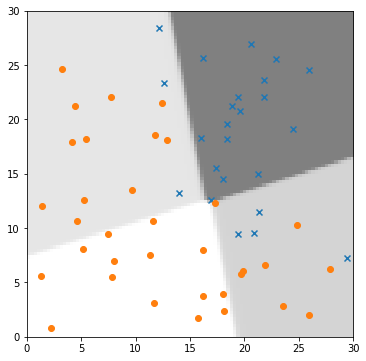

In [12]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = []
for x2 in np.linspace(0,30,100):
    for x1 in np.linspace(0,30,100):
        locations.append((x1,x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(0,30,0,30), cmap=plt.cm.gray_r, alpha=0.5)